In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data = sns.load_dataset("iris")

In [3]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
data['species'] = label_encoder.fit_transform(data['species'])
data['species'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
x= data.iloc[:,[0,1,2,3]].values
y= data.iloc[:,4].values

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [16]:
xtrain= sc.fit_transform(xtrain)
xtest= sc.fit_transform(xtest)

In [19]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [20]:
xpred= lr.predict(xtest)
xpred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ytest, xpred)
print(cm)

[[11  0  0]
 [ 0  6  7]
 [ 0  0  6]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest, xpred))
print("Accuracy-",metrics.accuracy_score(ytest, xpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



NameError: name 'metrics' is not defined

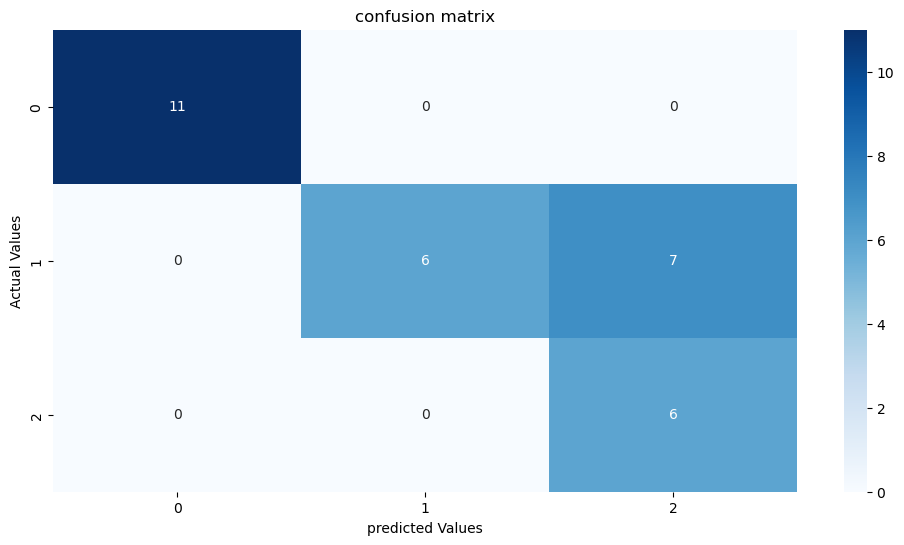

In [25]:
import matplotlib.pyplot as plt
cm= confusion_matrix(ytest, xpred)
plt.figure(figsize=(12,6))
plt.title("confusion matrix")
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("predicted Values")
plt.savefig('confusion_matrix.png')